# intrplate

## B-splines

A B-spline is a configurable spline function typically used for curve fitting.

A spline of order $n$ is a piecewise polynomial function of degree $n-1$ in a variable $x$.
The values of $x$ where the pieces of polynomial meet are known as knots, denoted $t_{0},t_{1},t_{2},\ldots ,t_{n}$ and sorted into non-decreasing order. 
When the knots are distinct, the first $n-2$ derivatives of the polynomial pieces are continuous across each knot. When $r$r knots are coincident, then only the first $n-r-1$ derivatives of the spline are continuous across that knot.

For a given sequence of knots, there is, up to a scaling factor, a unique spline $B_{i,n}(x)$ satisfying:

$$
B_{i,n}(x)=\left\{\begin{array}{ll}0&\mathrm {if} \quad x<t_{i}\quad \mathrm {or} \quad x\geq t_{i+n}\\\mathrm {nonzero} &\mathrm {otherwise} \end{array}\right.
$$

If we add the additional constrain that $\sum _{i}B_{i,n}(x)=1$ for all $x$ between the first and last knot, then the scaling factor
of $B_{i,n}(x)$ becomes fixed. The resulting $B_{i,n}(x)$ spline functions are called B-splines.

## Examples

### Age and income

Let's create a $n=3$ B-spline for a dataset. Let's assume we age a _age_ and _income_ dataset we want to simulate, and we want to provide the following points:

- Age 18, income 50k
- Age 31, income 100k
- Age 47, income 200k
- Age 60, income 300k

In [1]:
import numpy as np
import intrplate

data = np.array([[18, 50e3], [31, 100e3], [47, 200e3], [60, 300e3]])

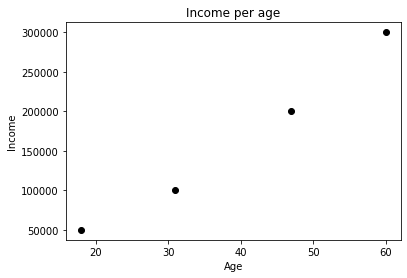

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1], c='k')
plt.title("Income per age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

Let's create a simple interpolation:

In [3]:
interpolated = intrplate.basis_spline(data=data, degree=3)

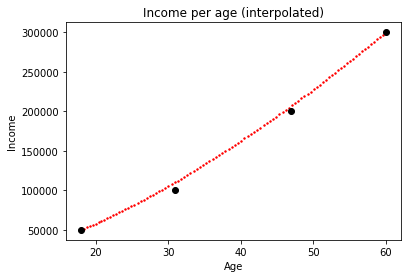

In [4]:
plt.scatter(interpolated[:,0], interpolated[:,1], s=2, c='red')
plt.title("Income per age (interpolated)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(data[:,0], data[:,1], c='k')
plt.show()

The dataset, however, does not contain any type of randomness right now.
We can use the `noisy_basis_spline` which adds random noise according to a normal distribution

$$
p^{\prime} = p + \epsilon,\quad\epsilon \sim \mathcal{N}\left(0,\sigma^2\right)
$$

In [5]:
interpolated_noisy = intrplate.noisy_basis_spline(data=data, degree=3, std=5.0)

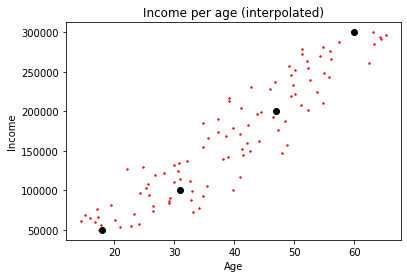

In [6]:
plt.scatter(interpolated_noisy[:,0], interpolated_noisy[:,1], s=2, c='red')
plt.scatter(data[:,0], data[:,1], c='k')
plt.title("Income per age (interpolated)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

### Categorical variables

For this example, let's take a categorical variable.
Let's assume as an index the _week number_ and for the categorical variable the possible temperature categories _cold_, _mild_, _hot_.

In [7]:
temperatures = np.array([[4, 'cold'], [18, 'mild'], [32, 'hot'], [37, 'mild'], [49, 'cold']])

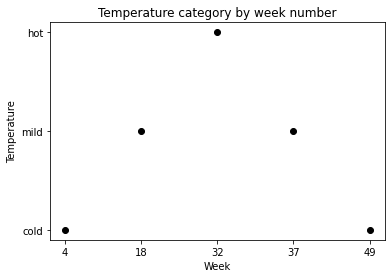

In [8]:
plt.scatter(temperatures[:,0], temperatures[:,1], c='k')
plt.title("Temperature category by week number")
plt.xlabel("Week")
plt.ylabel("Temperature")
plt.show()

In [9]:
interpolated_temperatures = intrplate.interpolate_categorical(temperatures[:,0].astype(np.float), temperatures[:,1], size=52)

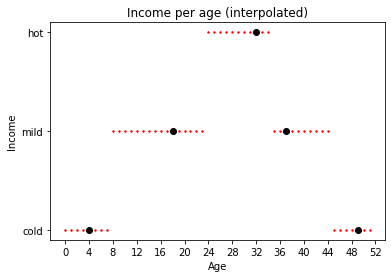

In [23]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib

fig, ax = plt.subplots()

plt.scatter(interpolated_temperatures[:,0], interpolated_temperatures[:,1], s=2, c='red')
plt.title("Temperature category by week number")
plt.xlabel("Week")
plt.ylabel("Temperature")
plt.scatter(temperatures[:,0].astype(np.float), temperatures[:,1], c='k')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=16))
plt.show()